In [1]:
import sys
sys.path.append('..')
sys.path.append('../policy-gradient-methods/')

In [2]:
%pylab inline
import numpy as np
import torch
import torch.nn as nn
from rvi_sampling.distributions.analytic_posterior import TwoStepRandomWalkPosterior
from rvi_sampling.StochasticProcess import RandomWalk, PyTorchWrap
from rvi_sampling import ISSampler, MCSampler, ABCSampler
from rvi_sampling import RVISampler
from rvi_sampling.distributions.proposal_distributions import SimonsProposal
from rvi_sampling.distributions.prior_distributions import DiscreteUniform
from pg_methods.utils.policies import MultinomialPolicy
from pg_methods.utils.networks import MLP_factory
from pg_methods.utils.baselines import MovingAverageBaseline
from rvi_sampling.plotting import visualize_proposal, multi_quiver_plot
torch.manual_seed(3)

Populating the interactive namespace from numpy and matplotlib


In [3]:
MC_SAMPLES = 1000
POSSIBLE_STEPS = [[-1], [+1]]
STEP_PROBS = np.ones(2)/2
DIMENSIONS = 1
rw = RandomWalk(DIMENSIONS,
                STEP_PROBS,
                POSSIBLE_STEPS, 
                n_agents=1,
                T=50,
                prior_distribution=DiscreteUniform(DIMENSIONS, -5, 10))
# rw.new_task()
# rw.new_task()
rw.new_task()
print('True Starting Position is:{}'.format(rw.x0))
print('Ending Position is:{}'.format(rw.xT))

True Starting Position is:[1]
Ending Position is:[9]


# What do three independent policies of the RVI sampler look like?

In [4]:
prw = PyTorchWrap(rw)
policies = []
for i in range(3):
    fn_approximator = MLP_factory(DIMENSIONS+1, hidden_sizes=[32, 32], output_size=2, hidden_non_linearity=nn.ReLU)
    policy = MultinomialPolicy(fn_approximator)
    policy_optimizer = torch.optim.RMSprop(fn_approximator.parameters(),lr=0.001)
    policies.append(policy)
    rvi = RVISampler(policy, policy_optimizer, baseline=MovingAverageBaseline(0.99))
    rvi_results = rvi.solve(prw, MC_SAMPLES, feed_time=True)
    print(rvi_results.expectation(True), rvi_results.variance(True))

../rvi_sampling/StochasticProcess.py:136: RuntimeWarning: divide by zero encountered in log
  step_log_probs = np.log(self.prior.pdf(self.x_agent))


1.2223131023830878 0.08403264371089543
0.6524533407870058 0.0504130338191238
1.3840757277350126 0.04723797260913865


In [5]:
t, x, x_arrows, y_arrow_list = visualize_proposal(policies, 50, 10)

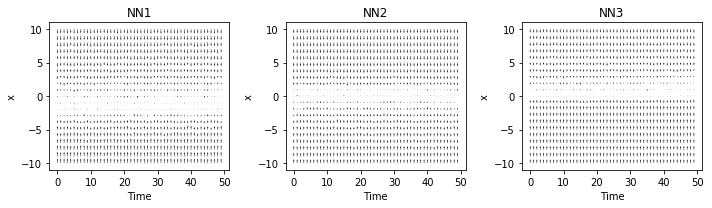

In [14]:
ax = multi_quiver_plot(t, x, x_arrows, y_arrow_list, titles=['NN1', 'NN2', 'NN3'], figsize=(10, 3))

# How does the policy evolve over training iterations?

In [15]:
fn_approximator = MLP_factory(DIMENSIONS+1, hidden_sizes=[32, 32], output_size=2, hidden_non_linearity=nn.ReLU)
policy = MultinomialPolicy(fn_approximator)
policy_optimizer = torch.optim.RMSprop(fn_approximator.parameters(),lr=0.001)

visualizations = []
t, x, x_arrows, y_arrows = visualize_proposal([policy], 50, 10)
visualizations.append(y_arrows[0])
rvi = RVISampler(policy, policy_optimizer, baseline=MovingAverageBaseline(0.99))
rvi_results = rvi.solve(prw, 1, feed_time=True)
# print(rvi_results.expectation(True), rvi_results.variance(True))
t, x, x_arrows, y_arrows = visualize_proposal([policy], 50, 10)
visualizations.append(y_arrows[0])
rvi_results = rvi.solve(prw, 1, feed_time=True)
t, x, x_arrows, y_arrows = visualize_proposal([policy], 50, 10)
visualizations.append(y_arrows[0])
rvi_results = rvi.solve(prw, 5, feed_time=True)
t, x, x_arrows, y_arrows = visualize_proposal([policy], 50, 10)
visualizations.append(y_arrows[0])
rvi_results = rvi.solve(prw, 5, feed_time=True)
t, x, x_arrows, y_arrows = visualize_proposal([policy], 50, 10)
visualizations.append(y_arrows[0])
rvi_results = rvi.solve(prw, 5, feed_time=True)
t, x, x_arrows, y_arrows = visualize_proposal([policy], 50, 10)
visualizations.append(y_arrows[0])
rvi_results = rvi.solve(prw, 5, feed_time=True)
t, x, x_arrows, y_arrows = visualize_proposal([policy], 50, 10)
visualizations.append(y_arrows[0])
rvi_results = rvi.solve(prw, 5, feed_time=True)
t, x, x_arrows, y_arrows = visualize_proposal([policy], 50, 10)
visualizations.append(y_arrows[0])
rvi_results = rvi.solve(prw, 5, feed_time=True)
t, x, x_arrows, y_arrows = visualize_proposal([policy], 50, 10)
visualizations.append(y_arrows[0])

../rvi_sampling/StochasticProcess.py:136: RuntimeWarning: divide by zero encountered in log
  step_log_probs = np.log(self.prior.pdf(self.x_agent))


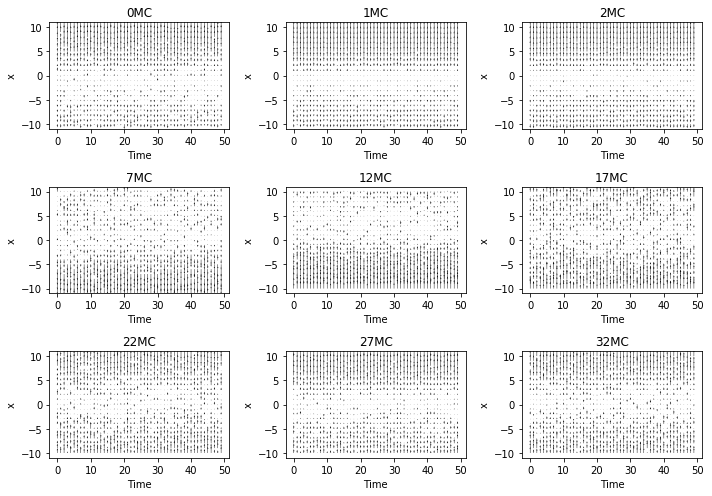

In [17]:
ax = multi_quiver_plot(t,x,x_arrows, visualizations, figsize=(10, 7), titles=['0MC', '1MC', '2MC', '7MC', '12MC', '17MC', '22MC', '27MC', '32MC'])